# This is a notebook to show a short example on how the DTW python algorithm can be used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dtw
from datetime import datetime

##### First, we generate two sample frames. I use the example of a simple 2D gaussian that doesn't change intensity in time but only moves position.

In [2]:
# this function is just to create 2D eliptic gaussians
def blob_maker(A, x, y, x0, y0, sigma_x, sigma_y):
    z = np.zeros([len(y), len(x)])
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            z[j,i] = A * np.exp(-((((x[i] - x0)**2) / \
                    (2.0 * sigma_x**2)) + (((y[j] - y0)**2) / \
                                           (2.0*sigma_y**2))))
    return z

In [3]:
# setting initial parameters for the gaussians
A = 32.
x0 = 55.
y0 = 41.
sigma_x = 12.
sigma_y = 7.
x = np.linspace(1, 128, 128)
y = np.linspace(1, 64, 64)
# gaussian 1
z1 = blob_maker(A, x, y, x0, y0, sigma_x, sigma_y)
# gaussian 2
z2 = blob_maker(A, x, y, x0 + 11., y0 - 5., sigma_x, sigma_y)
xx, yy = np.meshgrid(x, y)

Text(0.5, 1.0, 'frame 2, displaced (11, -5), centre at (66, 36)')

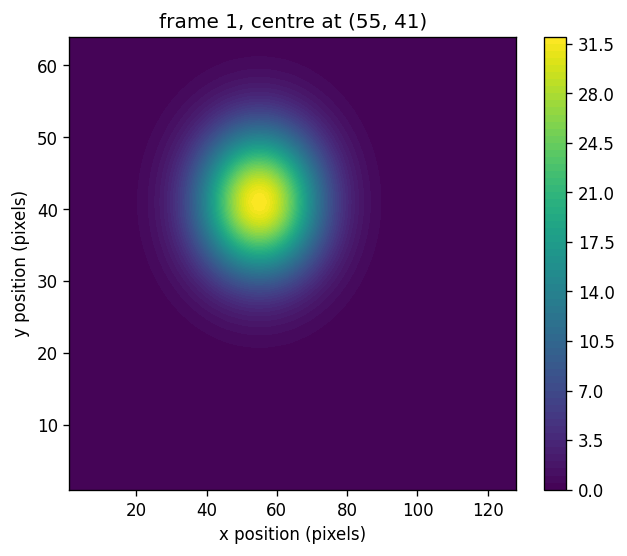

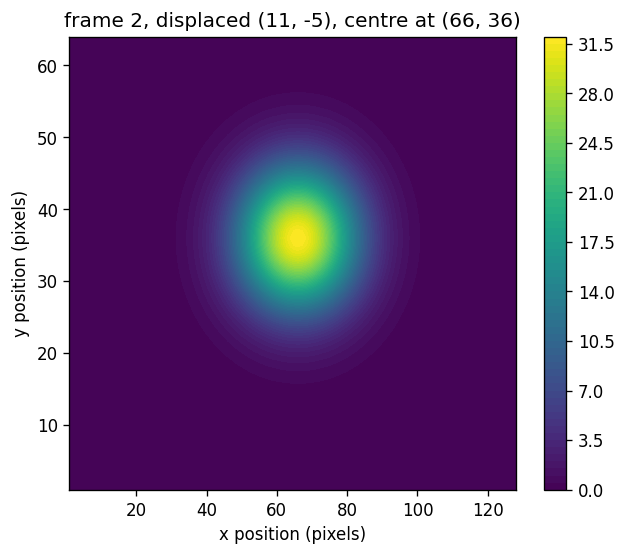

In [4]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 1, centre at (55, 41)')
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z2, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 2, displaced (11, -5), centre at (66, 36)')

We now run the images through the algorithm

In [5]:
m_list = [22, 16, 11, 8, 6, 4, 3]
strip_width_list = [32, 22, 16, 12, 8, 6, 4]
frame_bool = False
strip_bool = True
t1 = datetime.now()
# note here there are no specific R / z coordinates like in the 
# real data, so only xx and yy, which are essentially the 2D
# pixels arrays are entered
new_z1, oxx, oyy = DTW.all_iterations(z1, z2, xx, yy, \
                strip_width_list, m_list, frame_bool, strip_bool)
vel_x, vel_y = DTW.displacement_maker(xx, yy, oxx, oyy)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

Time taken for this test was 0:00:00.660423


Text(0.5, 1.0, 'warped frame 1')

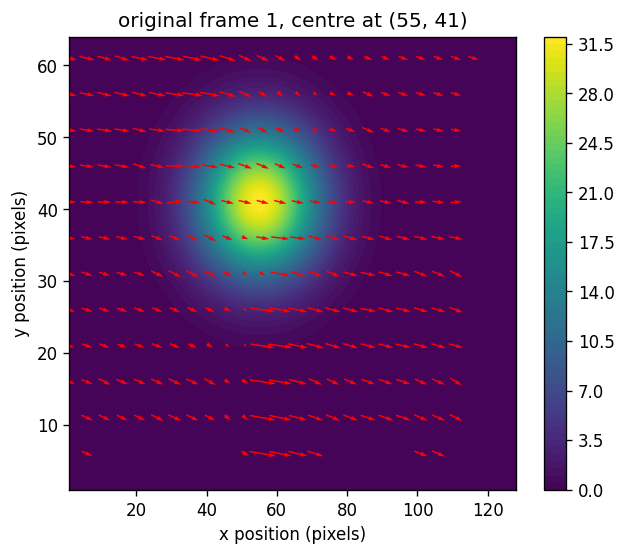

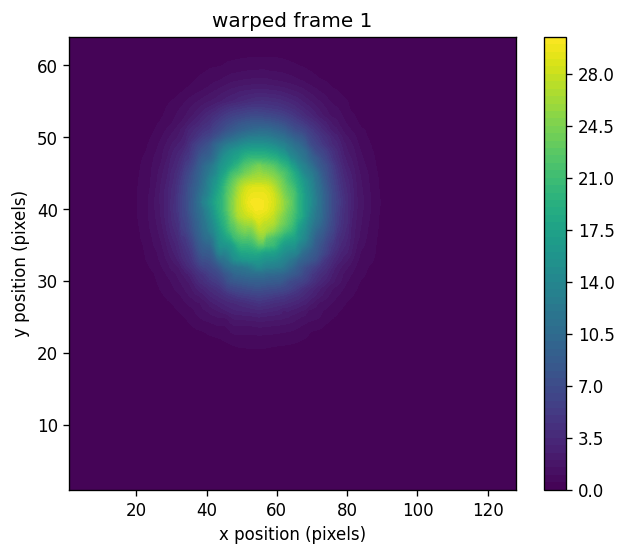

In [6]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 1, centre at (55, 41)')
plt.quiver(xx[::5, ::5], yy[::5, ::5], vel_x[::5, ::5], \
           vel_y[::5, ::5], color = 'r', pivot = 'mid')
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(xx, yy, new_z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('warped frame 1')

As can be seen, the algorithm distorts image 2 into image 1, and then returns the distorted coordinates. By comparing the distorted coordinates with the original ones, the displacement required to distort image 1 to image 2 is calculated, at the positions in image 1.

In [7]:
print('The actual displacement should have been vx = 11, vy = -5')
print('The calculated displacements: vx = {:.2f}, vy = {:.2f}'\
                          .format(vel_x[40,54], vel_y[40,54]))

The actual displacement should have been vx = 11, vy = -5
The calculated displacements: vx = 11.11, vy = -2.78


Here, I also do the same test above but using positions from ASDEX shot # 34676 to show that it still works as planned.

In [8]:
R = np.load('Rz.npz')['R']
z = np.load('Rz.npz')['z']

Text(0.5, 1.0, 'frame 2, centre at (2.10, -0.14)')

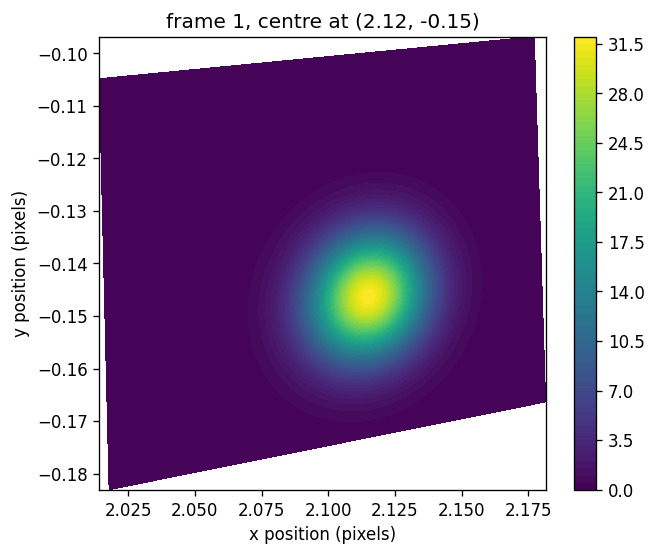

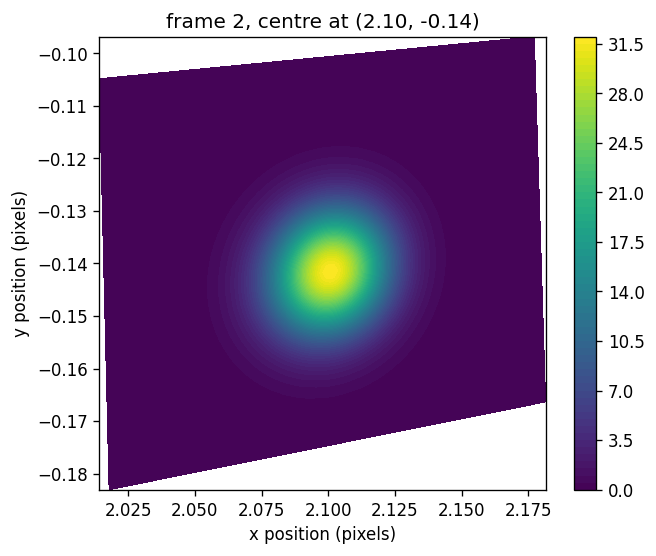

In [9]:
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 1, centre at ({:.2f}, {:.2f})'.\
                      format(R[40,54], z[40,54]))
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, z2, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('frame 2, centre at ({:.2f}, {:.2f})'.\
                      format(R[35,65], z[35,65]))

In [10]:
t1 = datetime.now()
new_z1, oxx, oyy = DTW.all_iterations(z1, z2, R, z, \
                strip_width_list, m_list, frame_bool, strip_bool)
vel_x, vel_y = DTW.displacement_maker(R, z, oxx, oyy)
t2 = datetime.now()
print('Time taken for this test was {}'.format(t2 - t1))

Time taken for this test was 0:00:00.506303


Text(0.5, 1.0, 'warped frame 1')

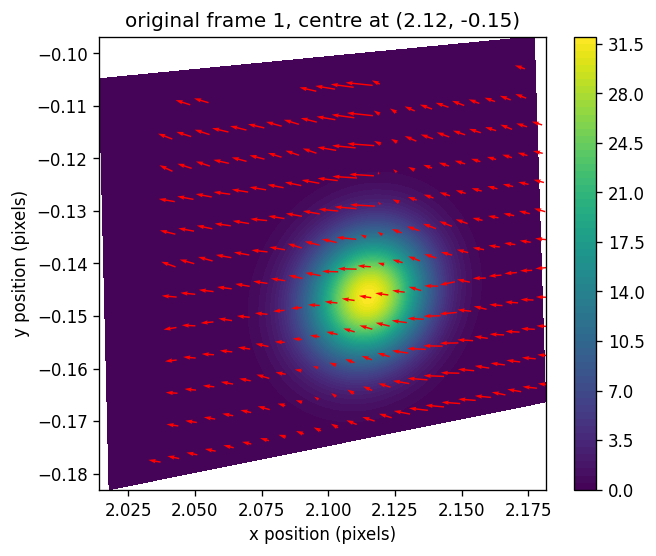

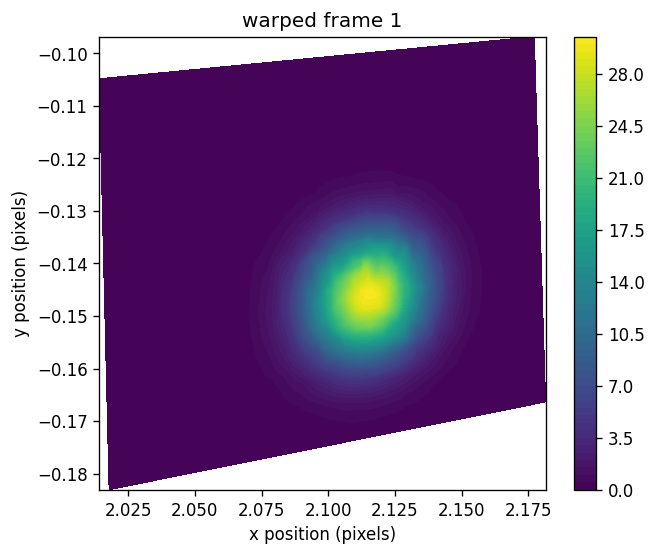

In [11]:
# There is no difference in time taken between
# different coordinates used
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('original frame 1, centre at ({:.2f}, {:.2f})'.\
                      format(R[40,54], z[40,54]))
plt.quiver(R[::5, ::5], z[::5, ::5], vel_x[::5, ::5], \
           vel_y[::5, ::5], color = 'r', pivot = 'mid')
plt.figure(figsize = (6,5), dpi = 120)
plt.contourf(R, z, new_z1, 64, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x position (pixels)')
plt.ylabel('y position (pixels)')
plt.title('warped frame 1')

In [12]:
print('The calculated displacements: vx = {:.5f}m, vy = {:.5f}m'\
                          .format(vel_x[40,54], vel_y[40,54]))

The calculated displacements: vx = -0.01433m, vy = 0.00209m


In the case of the simple gaussian, the above can be even further improved by normalising the strips using the strip bool. Testing is required to see if this is the case for all image types, and similar testing is required for the frame bool.
<br>
<br>
For extra assistance, the doc-string for all_iterations can be printed.

In [13]:
help(DTW.all_iterations)

Help on function all_iterations in module DTW:

all_iterations(z1, z2, oxx, oyy, strip_width_list, m_list, frame_bool=False, strip_bool=True, global_distance_new_bool=True, path_finder_new_bool=True, x_first=True, local_distance_new_bool=True, alpha='cosine', fast=True, l=3.0)
    # main function to be called that operates the entire algorithm. See doc string
    # for details of the inputs and outputs



### The following has been used to profile the code in its current state

In [14]:
import cProfile

In [15]:
def wrapper(z1, z2, xx, yy, strip_width_list, m_list):
    new_z1, oxx, oyy = DTW.all_iterations(z1, z2, xx, yy, \
                    strip_width_list, m_list, False, True)
    vel_x, vel_y = DTW.displacement_maker(xx, yy, oxx, oyy)
    return

In [16]:
cProfile.run('wrapper(z1, z2, xx, yy, strip_width_list, m_list)', sort = 0)

         653765 function calls (643140 primitive calls) in 0.709 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    61398    0.012    0.000    0.012    0.000 {built-in method builtins.issubclass}
    54150    0.004    0.000    0.004    0.000 {method 'append' of 'list' objects}
    42941    0.005    0.000    0.005    0.000 {built-in method builtins.len}
40614/29989    0.034    0.000    0.208    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    39620    0.007    0.000    0.007    0.000 {built-in method numpy.asarray}
    37780    0.006    0.000    0.006    0.000 {built-in method builtins.isinstance}
    33388    0.016    0.000    0.025    0.000 numerictypes.py:284(issubclass_)
    16694    0.017    0.000    0.044    0.000 numerictypes.py:358(issubdtype)
    13440    0.004    0.000    0.004    0.000 {method 'ravel' of 'numpy.ndarray' objects}
    11980    0.002    0.000    0.002    0.000 {built-in

In [17]:
cProfile.run('wrapper(z1, z2, xx, yy, strip_width_list, m_list)', sort = 1)

         653765 function calls (643140 primitive calls) in 0.868 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      282    0.056    0.000    0.103    0.000 DTW.py:286(path_finder_new)
     5376    0.055    0.000    0.288    0.000 interpolate.py:432(__init__)
     5376    0.044    0.000    0.044    0.000 interpolate.py:692(_check_bounds)
40614/29989    0.041    0.000    0.254    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      282    0.035    0.000    0.059    0.000 DTW.py:80(local_distance_new)
      282    0.035    0.000    0.035    0.000 DTW.py:119(global_distance_new)
     2338    0.029    0.000    0.044    0.000 function_base.py:4382(delete)
     5376    0.028    0.000    0.056    0.000 _util.py:247(_asarray_validated)
     5376    0.026    0.000    0.057    0.000 interpolate.py:570(fill_value)
    33388    0.023    0.000    0.033    0.000 numerictypes.py:284(issubclass_)
      566 

In [18]:
cProfile.run('wrapper(z1, z2, xx, yy, strip_width_list, m_list)', sort = 2)

         653765 function calls (643140 primitive calls) in 0.694 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.694    0.694 {built-in method builtins.exec}
        1    0.000    0.000    0.694    0.694 <string>:1(<module>)
        1    0.000    0.000    0.694    0.694 <ipython-input-15-23668db7deb7>:1(wrapper)
        1    0.000    0.000    0.694    0.694 DTW.py:1208(all_iterations)
        7    0.000    0.000    0.693    0.099 DTW.py:1170(whole_x_and_y_iteration)
        7    0.000    0.000    0.378    0.054 DTW.py:1146(whole_y_iteration)
        7    0.000    0.000    0.315    0.045 DTW.py:1122(whole_x_iteration)
     5376    0.048    0.000    0.242    0.000 interpolate.py:432(__init__)
40614/29989    0.034    0.000    0.204    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     5376    0.008    0.000    0.163    0.000 polyint.py:56(__call__)
        7   

This image was taken using the pyinstrument package
![title](profile.png)